In [4]:
require(data.table)
require(tidyverse)

In [7]:
binary.glist<- fread("../figures/Fig2/subfigs/DA_promoters_all.csv")
binary.glist%>%head(1)
binary.glist%>%pull(MoreOpenIn)%>%table

prom_peak,gene,MoreOpenIn
<chr>,<chr>,<chr>
1:109756132-109757774,SARS,beta 2


.
alpha 1 alpha 2  beta 1  beta 2 delta 1 delta 2 
    669    4815     889     691      39    2519 

## Make gmt file for GSEA

In [21]:
tmp2 <- as.character(read.table('../dat/glists/GO0036003.txt',stringsAsFactors = F))
tmp <-paste(c(sub(":","_",tmp2[1]),"na",tmp2[-1]),collapse = "\t")
tmp2 <- as.character(read.table('../dat/glists/GO0090276.txt',stringsAsFactors = F))
tmp <- c(tmp,paste(c(sub(":","_",tmp2[1]),"na",tmp2[-1]),collapse = "\t"))
tmp2 <- as.character(read.table('../dat/glists/GO0080135.txt',stringsAsFactors = F))
tmp <- c(tmp,paste(c(sub(":","_",tmp2[1]),"na",tmp2[-1]),collapse = "\t"))
tmp2 <- as.character(read.table('../dat/glists/GO0034976.txt',stringsAsFactors = F))
tmp <- c(tmp,paste(c(sub(":","_",tmp2[1]),"na",tmp2[-1]),collapse = "\t"))

f<- file ("../dat/glists/gsea_go.gmt",open = "wt")
cat(paste(tmp,collapse = "\n"),file = f)

In [17]:
tmp <- paste(c("Beta1","na",binary.glist$beta1),collapse = "\t")
tmp <- c(tmp,paste(c("Beta2","na",binary.glist$beta2),collapse = "\t"))

f<- file ("../dat/glists/gsea_beta.gmt",open = "wt")
cat(paste(tmp,collapse = "\n"),file = f)

In [16]:

tmp <- paste(c("Alpha1","na",binary.glist$alpha1),collapse = "\t")
tmp <- c(tmp,paste(c("Alpha2","na",sample(binary.glist$alpha2,500)),collapse = "\t"))

#tmp <- c(tmp,paste(c("Beta1","na",binary.glist$beta1),collapse = "\t"))
#tmp <- c(tmp,paste(c("Beta2","na",binary.glist$beta2),collapse = "\t"))

f<- file ("../dat/glists/gsea_alpha.gmt",open = "wt")
cat(paste(tmp,collapse = "\n"),file = f)

## 1. EnrichR


In [6]:
require(enrichR)
require(tidyverse)
dbs <- listEnrichrDbs()
dbs%>% filter(grepl('KEGG',libraryName) | grepl("GO_Biological_Process",libraryName))

Loading required package: enrichR
Warning message:
“package ‘enrichR’ was built under R version 3.5.2”Welcome to enrichR
Checking connection ... Connection is Live!


geneCoverage,genesPerTerm,libraryName,link,numTerms
<dbl>,<dbl>,<chr>,<chr>,<dbl>
4128,48,KEGG_2013,http://www.kegg.jp/kegg/download/,200
14264,58,GO_Biological_Process_2015,http://www.geneontology.org/GO.downloads.annotations.shtml,5192
7682,78,GO_Biological_Process_2013,http://www.geneontology.org/GO.downloads.annotations.shtml,941
3800,48,KEGG_2015,http://www.kegg.jp/kegg/download/,179
7010,87,KEGG_2016,http://www.kegg.jp/kegg/download/,293
13822,21,GO_Biological_Process_2017,http://www.geneontology.org/,3166
13247,49,GO_Biological_Process_2017b,http://www.geneontology.org/,10125
14433,36,GO_Biological_Process_2018,http://www.geneontology.org/,5103
7802,92,KEGG_2019_Human,https://www.kegg.jp/,308


In [8]:
go.res <- list()
for (i in c("alpha 1", "alpha 2", "beta 1", "beta 2", "delta 1", "delta 2")) {
    go.res[[i]] <- enrichr(binary.glist %>% filter(MoreOpenIn == i) %>% pull(gene), 
        c("GO_Biological_Process_2018", "KEGG_2019_Human"))
}

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2019_Human... Done.
Parsing results... Done.


In [9]:
saveRDS(go.res,file = "../dat/1910_v2/enrichr.go.res.Rdata")

In [15]:
go.res[['alpha 1']]$GO_Biological_Process_2018%

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
2404,sensory perception of chemical stimulus (GO:0007606),3/328,0.9985572,1,0,0,0.2836075,0.0004094788,GNAL;SYT10;CD36
2405,rRNA metabolic process (GO:0016072),1/201,0.9986675,1,0,0,0.1542674,0.0002056938,RPL15
2406,rRNA processing (GO:0006364),1/203,0.9987527,1,0,0,0.1527475,0.0001906340,RPL15
2407,ribosome biogenesis (GO:0042254),1/227,0.9994353,1,0,0,0.1365980,0.0000771534,RPL15
2408,ncRNA processing (GO:0034470),1/228,0.9994537,1,0,0,0.1359989,0.0000743223,RPL15


In [ ]:
go.res.list <- lapply(names(go.res), function(ntest) go.res[[ntest]]$GO_Biological_Process_2018)
names(ttest.res.list) <- as.character(go.res)
require(writexl)
write_xlsx(ttest.res.list, "../figures/Fig2/subfigs/fig2D_sub_vs_sub.xlsx")
system("open ../figures/Fig2/subfigs/fig2D_sub_vs_sub.xlsx")

fwrite(ttest.res.ct, "../figures/Fig2/subfigs/fig2D_sub_vs_sub.csv")
system("open ../figures/Fig2/subfigs/fig2D_sub_vs_sub.csv")

### Top 5 pval

##### manually calc GO:0050708

##### EnrichR's results

In [7]:
head(go.res$alpha1$GO_Biological_Process_2018%>%arrange((P.value)),n=20)
head(go.res$alpha2$GO_Biological_Process_2018%>%arrange((P.value)),n=20)
head(go.res$beta1$GO_Biological_Process_2018%>%arrange((P.value)),n=20)
head(go.res$beta2$GO_Biological_Process_2018%>%arrange((P.value))n=20)

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),9/108,7.599379e-07,0.0008138935,1.285033e-06,0.001376270,-1.270394,17.89988,NEUROD1;RFX6;RSAD2;ABCC8;GCG;KCNA5;GCK;SYT7;LLGL2
regulation of insulin secretion (GO:0050796),8/99,4.004249e-06,0.0020410744,6.309472e-06,0.003356225,-1.298500,16.13796,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
regulation of peptide hormone secretion (GO:0090276),7/74,5.717295e-06,0.0020410744,9.401192e-06,0.003356225,-1.840800,22.22216,NEUROD1;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
positive regulation of insulin secretion (GO:0032024),4/32,2.124413e-04,0.0568811566,3.209472e-04,0.085933619,-1.707040,14.43618,SLC30A8;RFX6;GCG;GCK
insulin secretion (GO:0030073),3/19,6.872223e-04,0.1472030084,1.031285e-03,0.220901205,-2.164335,15.76253,NEUROD1;SLC30A8;CAMK2G
positive regulation of ion transmembrane transporter activity (GO:0032414),3/24,1.387216e-03,0.2353312807,1.894135e-03,0.320606911,-2.492244,16.40010,ANK2;PDZK1;ATP1B1


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
ubiquitin-dependent protein catabolic process (GO:0006511),69/342,4.165986e-08,8.521936e-05,6.282952e-06,0.02565958,-1.077469,18.31022,RNF11;UBE3C;UBXN2A;FAF1;TNFAIP3;ARRB2;FBXO21;UBE2L3;PSMD9;UCHL1;MAEA;KAT5;PSMD3;ARIH2;PSMD1;ARIH1;RNF44;ANAPC7;FBXW11;AXIN1;UBE4B;VPS37A;PSMA5;RNF168;PSMA3;WDR81;PSMA1;DDIT3;PSME3;KCTD13;DTL;SQSTM1;ANAPC1;BIRC2;ANAPC2;KLHL18;VCP;PSMD12;PSMD11;PSMD13;RNF38;VPS4A;UBR3;FBXO45;BAG6;ZNRF1;BTBD1;UBB;PSMB3;HECTD4;BTBD2;UBC;RBBP6;UBE2H;ANKIB1;UBE2I;SMURF2;SIAH1;UBE2G1;UBE2A;BTBD9;FBXL14;ABTB2;NSFL1C;RNF145;TOLLIP;CTNNB1;TRIP12;STUB1
regulation of transcription from RNA polymerase II promoter (GO:0006357),217/1479,4.173328e-08,8.521936e-05,1.605288e-05,0.02846125,-1.376840,23.39522,RB1;SMARCB1;MAML1;BACH1;ELK4;ZNF609;KAT5;ZMIZ1;ZC3H12A;EPC1;EPC2;JUNB;IER5;SMARCC1;EBF4;SOX12;DDIT3;RFX5;ANKRA2;ATF3;ATF4;DHX9;CTBP1;PRKDC;EPAS1;TSHZ1;RTF1;ZNF24;ZBTB4;MTDH;ZNF821;ZNF148;PPARGC1A;ZBED4;ABCA2;PLK3;CREBBP;XRCC6;JUND;PDE2A;NFATC3;INO80;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;AGO2;SNAI1;CDK12;CDK13;CDKN1A;GMEB2;TCF25;PTPRN;BHLHE41;CTCF;BMI1;AATF;GLI3;MECP2;HYAL2;HEY2;CIC;TEAD1;HRAS;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;PROX1;FOS;MED26;SLTM;MED20;RARA;JDP2;RHOQ;DOT1L;RELA;RELB;MNT;CUX1;NFIL3;EPCAM;CREG1;NSD1;HSF1;UBN1;HSF4;LEO1;AAMDC;BRD4;CDKN2B;BMP8A;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;NFIA;FOSB;CTNNB1;KIAA1958;FOXA1;CRTC2;PRDM2;RORA;NR3C1;YY1;FOXQ1;WWC3;ZGPAT;USP2;POU3F2;FOXP1;NPAS4;DGKQ;GPRIN1;SQSTM1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;FAM83G;RAI1;UBB;UBC;ORC2;CAMTA1;SKIL;BCL9L;BPTF;CBX8;ESRRA;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;PTCH1;ECD;HMGA1;INHBA;SMAD5;BMP6;NFKB2;NR4A1;CDK8;MAVS;BMP2;CNOT7;CNOT2;BHLHE40;MAFF;TAF4B;NFE2L1;RNF10;DDX3X;LDB1;FHL2;YBX1;TRIAP1;PKD2;FLCN;SIN3A;NCK1;DACT1;KDM6B;KLF11;TGIF2;ETV6;DUSP22;CREB3;CTDSP1;ZNF639;CRY2;CRY1;MET;NFAT5;HDAC5;SMARCD1;NUFIP1;SRF;CEBPG;DDX20;FOXK2;LIN9;DLL4;ELMSAN1;E2F1;BEND3;E2F5;FNIP2;E2F6;SPEN;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;MEIS2;TBX3;DNAJA3;ASXL2;TRIM37;QRICH1;CEBPZ;TAF3;SSBP3;LPIN2
"regulation of transcription, DNA-templated (GO:0006355)",228/1599,1.908938e-07,2.229865e-04,5.048987e-05,0.03090201,-1.835439,28.39709,RB1;SMARCB1;EHMT1;JMJD1C;GPATCH3;BACH1;RPL6;UBE2L3;ELK4;PSMD9;ZNF609;TRIM28;KAT5;GPBP1;EPC1;EPC2;JUNB;ATXN7L3;HES6;SMARCC1;SFMBT1;DAPK3;SOX12;KARS;THAP7;DDIT3;RFX5;ANKRA2;ATF3;ATF4;L3MBTL1;CASZ1;ZNF274;SET;DHX9;CTBP1;EPAS1;TSHZ1;ZNF24;ZBTB4;DEDD2;ZNHIT3;NUP85;HIVEP3;PATZ1;ZNF148;PPARGC1A;ZBED4;ABCA2;CREBBP;XRCC6;JUND;NFATC3;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;SNAI1;MMS19;FANK1;CDKN1A;GMEB2;BHLHE41;RSF1;CTCF;AATF;GLI3;MECP2;CHMP1A;HEY2;UIMC1;JARID2;CIC;TEAD1;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;NCOA4;PROX1;BAZ1A;FOS;MED26;TOX3;SLTM;MED20;RARA;MAPRE3;JDP2;PCNA;MYCBP;RELA;CUX1;NFIL3;CREG1;NSD1;UBN1;HSF4;ZIM2;BRD4;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;CENPF;RYBP;NFIA;FOSB;CTNNB1;KIAA1958;CDK5R1;FOXA1;ZNF571;PRDM2;RORA;NR3C1;YY1;FOXQ1;ZNF84;SCMH1;ZNF207;MAP3K5;PITX3;PIAS4;MAP2K1;ZGPAT;FBXW11;USP3;POU3F1;ILF2;POU3F2;FOXP1;PIAS1;NPAS4;DGKQ;ZNF674;KHDRBS1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;PHF21B;SBNO1;RAI1;ATXN1;DVL1;BPTF;ESRRA;ZNF540;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;DENND4A;HMGA1;INHBA;SMAD5;NFKB2;BMP2;GCLC;CNOT7;COPS2;CNOT2;RFXAP;BHLHE40;CNOT8;ZNF775;NFE2L1;RNF10;LDB1;CHD7;HP1BP3;FHL2;CBY1;YBX1;SIN3A;UBTF;HMG20A;YWHAH;KLF11;TGIF2;AXIN1;GLRX2;ETV6;CTDSP1;ZNF639;CRY2;CRY1;TERF2IP;CREB5;HDAC5;SMARCD1;CEBPG;FOXK2;LIN9;POLR2A;CCDC85B;ELMSAN1;BAHD1;TP53INP2;TP53INP1;E2F1;ZNF623;MTA3;POLR2L;ZNF860;SPEN;TAF15;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;HNRNPAB;TBX3;NUP35;QRICH1;NAA16;TAF3
negative regulation of transcription from RNA polymerase II promoter (GO:0000122),98/566,2.184001e-07,2.229865e-04,2.470313e-05,0.02846125,-1.085284,16.64494,RB1;NR3C1;BACH1;ELK4;YY1;KAT5;WWC3;EPC1;JUNB;ZGPAT;USP2;DDIT3;ATF3;DDX5;CTBP1;RTF1;FOXO3;ZBTB4;MTDH;UBB;UBC;ORC2;ZNF148;SKIL;BPTF;CBX8;PLK3;CREBBP;ZFHX3;SMAD4;JUND;SMAD3;UBE2I;SMURF2;PTCH1;PDE2A;NFATC3;BMP6;NFKB2;BMP2;CNOT7;CNOT2;BHLHE40;SNAI1;LDB1;TCF25;F

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),10/108,5.171341e-08,5.491964e-05,7.844866e-08,8.331248e-05,-1.270394,21.31409,NEUROD1;MYOM1;G6PC2;RSAD2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of peptide hormone secretion (GO:0090276),8/74,3.490500e-07,1.853455e-04,5.572617e-07,2.959059e-04,-1.842008,27.38707,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of insulin secretion (GO:0050796),8/99,3.271736e-06,1.158195e-03,4.249006e-06,1.504148e-03,-1.297737,16.39067,NEUROD1;G6PC2;SLC30A8;ABCC8;KCNA5;STX1A;GCK;SYT7
response to glucose (GO:0009749),5/48,7.175643e-05,1.905133e-02,9.574665e-05,2.542074e-02,-1.725631,16.46638,NEUROD1;SLC30A8;INS-IGF2;GCK;INS
response to hexose (GO:0009746),4/28,1.121005e-04,2.381014e-02,1.642984e-04,3.489698e-02,-1.906380,17.34066,NEUROD1;SLC30A8;INS-IGF2;INS
carbohydrate homeostasis (GO:0033500),5/64,2.843113e-04,5.032311e-02,3.355078e-04,5.938488e-02,-1.402205,11.44962,NEUROD1;G6PC2;INS-IGF2;GCK;INS


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of transcription from RNA polymerase II promoter (GO:0006357),88/1479,7.346297e-07,0.00153494,4.728334e-05,0.06775702,-1.378054,19.46350,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;VLDLR;CTCF;YBX1;TRIAP1;NR3C1;BMI1;ETS1;DCAF6;FLCN;RPS6KA5;ZNF608;SIN3A;ZNF367;KDM6B;NCOA1;BRD2;MLIP;KLF13;TCF12;USP2;SARS;FOXP1;DUSP22;PPM1A;ZEB1;CTDSP1;DDIT3;ZSCAN21;TRIB3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;TSHZ1;CEBPG;HDAC9;FOXO1;ARNTL;DLL4;PPP3R1;MNT;NFIL3;CREG1;UBC;UBN1;HSF4;BEND3;CAMTA2;ZNF821;FNIP2;PPARGC1A;SMAD3;UBE2I;FOXJ3;PDE2A;HMGA1;ELP3;DEK;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;BCL6;MAFF;KLF9;FOSB;TRIM37;QRICH1;CDK13;NFE2L1
"positive regulation of transcription, DNA-templated (GO:0045893)",71/1121,1.071138e-06,0.00153494,4.623498e-05,0.06775702,-1.714432,23.56794,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;CTCF;YBX1;GPATCH3;TRIAP1;NR3C1;ETS1;WDR43;DCAF6;FLCN;RPS6KA5;SIN3A;ATXN7L3;KDM6B;NCOA1;PCID2;MAP2K1;MLIP;TCF12;TFB2M;ARID1B;TGFBR1;PPM1A;PSRC1;DDIT3;ZSCAN21;MAPRE3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;CREB5;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;HIVEP3;CAMTA2;ZNF821;PPARGC1A;TRIM44;SMAD3;FOXJ3;IL31RA;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;MAFF;CDK13;NFE2L1;RNF187
positive regulation of transcription from RNA polymerase II promoter (GO:0045944),53/849,3.875242e-05,0.03702148,6.166337e-04,0.32017518,-1.895121,19.25124,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;YBX1;TRIAP1;NR3C1;ETS1;DCAF6;FLCN;RPS6KA5;SIN3A;KDM6B;NCOA1;MLIP;TCF12;DDIT3;ZSCAN21;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;CAMTA2;ZNF821;PPARGC1A;SMAD3;FOXJ3;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;KLF6;NR4A3;MAFF;CDK13;NFE2L1
positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003),7/30,6.460974e-05,0.04629288,3.672522e-04,0.32017518,-1.830269,17.65687,CEBPB;HSPA5;DDIT3;SESN2;HSF4;ATF3;VEGFA
gluconeogenesis (GO:0006094),8/42,9.164061e-05,0.05252840,4.678746e-04,0.32017518,-2.127531,19.78100,CRTC2;TPI1;PGK1;ALDOA;PPARGC1A;GAPDH;PGM1;PCK2
cellular protein modification process (GO:0006464),58/1002,1.351167e-04,0.05993507,1.885021e-03,0.36910345,-1.741244,15.51339,GSK3B;APP;TP53RK;LAMC1;PTPRH;DUSP16;DCAF6;CDC14B;RPS6KA5;TLK1;JAK2;FBXO7;DUSP4;ATG3;MAP2K1;PRKCH;WSB2;DAPK1;FBXW7;DAPK2;ALG3;CSNK1D;CSNK1E;FBXO11;TGFBR1;NRBP1;TGFBR2;DUSP22;PPM1A;PSMA3;PSMA1;CTDSP1;TNIK;UBA52;PHLPP2;SDC2;FBXL20;FUT5;NUAK1;MKNK2;DCAF10;MAPK6;FNIP2;MAP4K4;B3GALNT2;UBE2I;KLHL21;SSH2;CP;CLK3;RAB11A;FBXO30;FBXO31;COPS6;MEX3B;CALU;CDK13;FGFR1


In [34]:
for (i in c("alpha1","alpha2","beta1","beta2")){
     fwrite(go.res[[i]]$GO_Biological_Process_2018%>%arrange((P.value)),  
            file=paste0("../dat/1901/",i,"_enrichR_BP_all.csv"))
     system(paste0("open ../dat/1901/",i,"_enrichR_BP_all.csv"))
}

### Top 5 combined scores

In [8]:
head(go.res$alpha1$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(go.res$alpha2$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(go.res$beta1$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(go.res$beta2$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),7/74,4.441467e-06,0.0015189817,7.715881e-06,0.002638831,-1.840800,22.68698,NEUROD1;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
white fat cell differentiation (GO:0050872),2/7,1.624132e-03,0.2082949274,2.732324e-03,0.296775675,-2.999516,19.26523,CTBP2;CTBP1
regulation of protein secretion (GO:0050708),9/108,5.508309e-07,0.0005651526,9.984078e-07,0.001024366,-1.270394,18.30871,NEUROD1;RFX6;RSAD2;ABCC8;GCG;KCNA5;GCK;SYT7;LLGL2
atrial cardiac muscle cell to AV node cell signaling (GO:0086026),2/9,2.751593e-03,0.2171641884,4.125852e-03,0.296775675,-2.877708,16.96575,ANK2;KCNA5
positive regulation of ion transmembrane transporter activity (GO:0032414),3/24,1.242445e-03,0.2082949274,1.738212e-03,0.296775675,-2.492244,16.67479,ANK2;PDZK1;ATP1B1
regulation of insulin secretion (GO:0050796),8/99,3.012434e-06,0.0015189817,5.048594e-06,0.002589929,-1.298500,16.50753,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
"regulation of transcription, DNA-templated (GO:0006355)",221/1599,6.183371e-08,8.331062e-05,2.074235e-05,0.01487097,-1.835439,30.46612,RB1;SMARCB1;EHMT1;JMJD1C;GPATCH3;RPL6;UBE2L3;ELK4;PSMD9;ZNF609;TRIM28;KAT5;GPBP1;EPC1;EPC2;JUNB;ATXN7L3;HES6;SMARCC1;SFMBT1;SOX12;KARS;THAP7;DDIT3;RFX5;ANKRA2;ATF3;ATF4;L3MBTL1;CASZ1;ZNF274;SET;DHX9;CTBP1;EPAS1;ZNF24;ZBTB4;DEDD2;ZNHIT3;NUP85;HIVEP3;PATZ1;ZNF148;PPARGC1A;ZBTB7A;ZBED4;XRCC6;JUND;NFATC3;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;SNAI1;MMS19;FANK1;CDKN1A;GMEB2;BHLHE41;RSF1;CTCF;AATF;GLI3;CHMP1A;HEY2;UIMC1;JARID2;CIC;TEAD1;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;NCOA4;PROX1;BAZ1A;FOS;MED26;SLTM;MED20;RARA;MAPRE3;JDP2;PCNA;MYCBP;RELA;CUX1;NFIL3;CREG1;NSD1;UBN1;HSF4;ZIM2;BRD4;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;CENPF;RYBP;NFIA;FOSB;CTNNB1;KIAA1958;CDK5R1;FOXA1;ZNF571;PRDM2;RORA;NR3C1;YY1;FOXQ1;ZNF84;SCMH1;ZNF207;MAP3K5;PITX3;PIAS4;MAP2K1;FBXW11;USP3;POU3F1;ILF2;POU3F2;HIC1;FOXP1;PIAS1;NPAS4;DGKQ;ZNF674;KHDRBS1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;PHF21B;SBNO1;RAI1;ATXN1;DVL1;BPTF;ESRRA;ZNF540;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;DENND4A;HMGA1;INHBA;SMAD5;NFKB2;BMP2;GCLC;CNOT7;CNOT2;RFXAP;BHLHE40;CNOT8;ZNF775;NFE2L1;RNF10;LDB1;CHD7;HP1BP3;FHL2;CBY1;YBX1;SIN3A;UBTF;HMG20A;YWHAH;KLF11;TGIF2;AXIN1;GLRX2;ETV6;CTDSP1;ZNF639;CRY2;CRY1;TERF2IP;CREB5;HDAC5;SMARCD1;CEBPG;FOXK2;LIN9;POLR2A;CCDC85B;ELMSAN1;BAHD1;TP53INP2;TP53INP1;E2F1;ZNF623;MTA3;POLR2L;ZNF860;SPEN;TAF15;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;HNRNPAB;TBX3;NUP35;QRICH1;NAA16;TAF3
"transcription, DNA-templated (GO:0006351)",66/357,3.529426e-07,2.037992e-04,2.575378e-05,0.01487097,-1.872790,27.82397,GMEB2;LDB1;RSF1;YBX2;YBX1;ARRB2;NR3C1;PWP1;SNAPC2;TRIM29;UBTF;EPC1;NELFA;NCOA1;KLF11;BAZ1A;ILF2;MAF;RRAGC;POLR1C;MED20;PTMA;CREB5;ATF4;GTF3C2;NFAT5;DDX5;GTF3C4;CBFB;KMT2A;EPAS1;SRF;RTF1;FOXO3;GTF2E2;TAF5L;MNT;POLR2A;DVL1;HSF1;E2F1;LEO1;HIVEP3;ZNF148;POLR2L;BPTF;ZFHX3;TAF15;BRF1;ECD;NFATC3;DEK;KLF4;MEIS2;HIPK3;FOSL1;TADA2A;POLR3A;FUBP3;MAFF;TAF4B;CEBPZ;MMS19;TAF5;TAF3;NFE2L1
"positive regulation of transcription, DNA-templated (GO:0045893)",164/1121,9.974128e-08,1.007886e-04,2.051225e-05,0.01487097,-1.711188,27.58552,FOXA1;RB1;CRTC2;SMARCB1;MAML1;PRDM2;RORA;GPATCH3;NR3C1;ELK4;PSMD9;ZNF609;TRIM28;KAT5;ZMIZ1;ZC3H12A;EPC1;JUNB;IER5;ATXN7L3;MAP3K5;PITX3;SMARCC1;MAP2K1;FBXW11;EBF4;SOX12;POU3F1;ILF2;PIAS1;NPAS4;KARS;DDIT3;GPRIN1;RFX5;SQSTM1;ATF3;ATF4;CASZ1;DDX5;KMT2A;DHX9;EPAS1;RTF1;FOXO3;ZNF24;RAI1;UBB;NUP85;DVL1;UBC;CAMTA1;HIVEP3;ZNF821;PPARGC1A;BPTF;ESRRA;ZFHX3;XRCC6;SMAD4;JUND;SMAD3;ECD;NFATC3;HMGA1;INO80;INHBA;SMAD5;BMP6;FOSL2;NFKB2;FOSL1;NR4A1;CDK8;MAVS;BMP2;FUBP3;RFXAP;MAFF;AGO2;SNAI1;TAF4B;MMS19;CDK12;CDK13;NFE2L1;FANK1;RNF10;DDX3X;LDB1;PTPRN;FHL2;RSF1;CTCF;YBX1;TRIAP1;PKD2;AATF;GLI3;WDR43;FLCN;SIN3A;HYAL2;HEY2;UBTF;TEAD1;HRAS;YWHAH;NCK1;KDM6B;NCOA1;UTP15;TCF12;NCOA4;AXIN1;PROX1;FOS;ARID1B;CREB3;ZNF639;RARA;MAPRE3;MET;RHOQ;CREB5;NFAT5;HDAC5;SMARCD1;NUFIP1;SRF;CEBPG;DOT1L;FOXK2;RELA;RELB;RXRA;EPCAM;NSD1;TP53INP2;HSF1;TP53INP1;E2F1;LEO1;AAMDC;BRD4;CDKN2B;TAF15;FOXJ3;FOXJ1;ZNF76;KLF4;GRHL1;MEIS2;HNRNPAB;MAD2L2;RYBP;NFIA;ASXL2;CTNNB1;NAA16;CEBPZ;TAF3;SSBP3;LPIN2
"negative regulation of transcription, DNA-templated (GO:0045892)",124/814,4.668253e-07,2.358635e-04,4.787441e-05,0.02418855,-1.754581,25.57708,RB1;EHMT1;NR3C1;ELK4;YY1;TRIM28;KAT5;SCMH1;WWC3;EPC1;JUNB;PIAS4;FBXW11;SFMBT1;USP2;HIC1;FOXP1;THAP7;DDIT3;ATF3;ZNF674;L3MBTL1;KHDRBS1;DDX5;SET;CTBP1;RTF1;FOXO3;ZNF24;ZBTB4;DEDD2;MTDH;ATXN1;UBB;UBC;ORC2;PATZ1;ZNF148;SKIL;ZBTB7A;BPTF;CBX8;ZNF540;PLK3;ZFHX3;XRCC6;SMAD4;JUND;SMAD3;UBE2I;SMURF2;PTCH1;PDE2A;HMGA1;BMP6;NFKB2;BMP2;GCLC;CNOT7;CNOT2;BHLHE40;SNAI1;LDB1;TCF25;FHL2;BHLHE41;CBY1;RSF1;CTCF;BMI1;GLI3;FLCN;SIN3A;CHMP1A;HEY2;UIMC1;JARID2;CIC;DACT1;KLF11;ZHX2;TGIF2;FOXD1;PROX1;ETV6;DUSP22;ZNF639;CRY2;RARA;CRY1;HDAC5;DDX20;RELA;RELB;DLL4;MNT;RXRA;CUX1;NFIL3;CCDC85B;BAHD1;NSD1;HSF1;E2F1;BEND3;FNIP2;E2F6;MTA3;SPEN;FOXJ1;KLF4;MEIS2;TBX3;GATAD2A;PER2;MAD2L2;CENPF;NFIA;DNAJA3;FO

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),8/74,3.072467e-07,1.637625e-04,5.247991e-07,2.797179e-04,-1.842008,27.62204,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of protein secretion (GO:0050708),10/108,4.415261e-08,4.706668e-05,7.280880e-08,7.761418e-05,-1.270394,21.51489,NEUROD1;MYOM1;G6PC2;RSAD2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
alpha-beta T cell activation (GO:0046631),2/7,1.606254e-03,1.902518e-01,2.570817e-03,2.405011e-01,-2.946308,18.95611,RSAD2;INS
response to hexose (GO:0009746),4/28,1.050943e-04,2.240609e-02,1.594104e-04,3.398629e-02,-1.906380,17.46369,NEUROD1;SLC30A8;INS-IGF2;INS
response to glucose (GO:0009749),5/48,6.629630e-05,1.766796e-02,9.225941e-05,2.458713e-02,-1.725631,16.60295,NEUROD1;SLC30A8;INS-IGF2;GCK;INS
regulation of insulin secretion (GO:0050796),8/99,2.889472e-06,1.026726e-03,4.007522e-06,1.424006e-03,-1.297737,16.55191,NEUROD1;G6PC2;SLC30A8;ABCC8;KCNA5;STX1A;GCK;SYT7


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
negative regulation of protein localization to nucleus (GO:1900181),4/12,5.330466e-04,0.079788661,0.0021825179,0.3653446,-3.094241,23.32099,FLCN;GSK3B;SIN3A;CABP1
"positive regulation of transcription, DNA-templated (GO:0045893)",69/1121,1.428984e-06,0.004064031,0.0000601157,0.1709691,-1.716055,23.09560,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;CTCF;YBX1;GPATCH3;TRIAP1;NR3C1;ETS1;WDR43;DCAF6;FLCN;RPS6KA5;SIN3A;ATXN7L3;NCOA1;PCID2;MAP2K1;MLIP;TCF12;TFB2M;ARID1B;TGFBR1;PPM1A;PSRC1;DDIT3;ZSCAN21;MAPRE3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;CREB5;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;HIVEP3;CAMTA2;ZNF821;PPARGC1A;TRIM44;SMAD3;IL31RA;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;MAFF;CDK13;NFE2L1;RNF187
gluconeogenesis (GO:0006094),8/42,7.416657e-05,0.042185944,0.0003926696,0.2791881,-2.127531,20.23111,CRTC2;TPI1;PGK1;ALDOA;PPARGC1A;GAPDH;PGM1;PCK2
positive regulation of transcription from RNA polymerase II promoter (GO:0045944),51/849,6.656432e-05,0.042185944,0.0009687303,0.3653446,-1.893466,18.21011,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;YBX1;TRIAP1;NR3C1;ETS1;DCAF6;FLCN;RPS6KA5;SIN3A;NCOA1;MLIP;TCF12;DDIT3;ZSCAN21;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;CAMTA2;ZNF821;PPARGC1A;SMAD3;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;KLF6;NR4A3;MAFF;CDK13;NFE2L1
positive regulation of transcription from RNA polymerase II promoter in response to endoplasmic reticulum stress (GO:1990440),4/12,5.330466e-04,0.079788661,0.0021825179,0.3653446,-2.398412,18.07659,CEBPB;HSPA5;DDIT3;ATF3
positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003),7/30,5.334047e-05,0.042185944,0.0003131437,0.2791881,-1.830854,18.01343,CEBPB;HSPA5;DDIT3;SESN2;HSF4;ATF3;VEGFA


In [40]:
for (i in c("alpha1","alpha2","beta1","beta2")){
     fwrite(head(go.res[[i]]$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)),n=20),  
            file=paste0("../dat/1901/",i,"_enrichR_BP_all.csv"))
     system(paste0("open ../dat/1901/",i,"_enrichR_BP_all.csv"))
}

### Top5 padj values 

In [9]:
head(go.res$alpha1$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))
head(go.res$alpha2$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))
head(go.res$beta1$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))
head(go.res$beta2$GO_Biological_Process_2018%>%arrange((Adjusted.P.value)))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),9/108,5.508309e-07,0.0005651526,9.984078e-07,0.001024366,-1.270394,18.30871,NEUROD1;RFX6;RSAD2;ABCC8;GCG;KCNA5;GCK;SYT7;LLGL2
regulation of peptide hormone secretion (GO:0090276),7/74,4.441467e-06,0.0015189817,7.715881e-06,0.002638831,-1.840800,22.68698,NEUROD1;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
regulation of insulin secretion (GO:0050796),8/99,3.012434e-06,0.0015189817,5.048594e-06,0.002589929,-1.298500,16.50753,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7
positive regulation of insulin secretion (GO:0032024),4/32,1.834204e-04,0.0470473433,2.862058e-04,0.073411796,-1.707040,14.68691,SLC30A8;RFX6;GCG;GCK
insulin secretion (GO:0030073),3/19,6.147033e-04,0.1261371260,9.454362e-04,0.194003505,-2.164335,16.00389,NEUROD1;SLC30A8;CAMK2G
white fat cell differentiation (GO:0050872),2/7,1.624132e-03,0.2082949274,2.732324e-03,0.296775675,-2.999516,19.26523,CTBP2;CTBP1


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of transcription from RNA polymerase II promoter (GO:0006357),210/1479,1.639798e-08,5.949550e-05,7.435169e-06,0.01487097,-1.378054,24.70315,RB1;SMARCB1;MAML1;ELK4;ZNF609;KAT5;ZMIZ1;ZC3H12A;EPC1;EPC2;JUNB;IER5;SMARCC1;EBF4;SOX12;DDIT3;RFX5;ANKRA2;ATF3;ATF4;DHX9;CTBP1;EPAS1;RTF1;ZNF24;ZBTB4;MTDH;ZNF821;ZNF148;PPARGC1A;ZBED4;PLK3;XRCC6;JUND;PDE2A;NFATC3;INO80;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;AGO2;SNAI1;CDK12;CDK13;CDKN1A;GMEB2;TCF25;PTPRN;BHLHE41;CTCF;BMI1;AATF;GLI3;HYAL2;HEY2;CIC;TEAD1;HRAS;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;PROX1;FOS;MED26;SLTM;MED20;RARA;JDP2;RHOQ;DOT1L;RELA;RELB;MNT;RXRA;CUX1;NFIL3;EPCAM;CREG1;NSD1;HSF1;UBN1;HSF4;LEO1;AAMDC;BRD4;CDKN2B;BMP8A;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;NFIA;FOSB;CTNNB1;KIAA1958;FOXA1;CRTC2;PRDM2;RORA;NR3C1;YY1;FOXQ1;WWC3;USP2;POU3F2;HIC1;FOXP1;NPAS4;DGKQ;GPRIN1;SQSTM1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;FAM83G;RAI1;UBB;UBC;ORC2;CAMTA1;SKIL;BPTF;CBX8;ESRRA;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;PTCH1;ECD;HMGA1;INHBA;SMAD5;BMP6;NFKB2;NR4A1;CDK8;MAVS;BMP2;CNOT7;CNOT2;BHLHE40;MAFF;TAF4B;NFE2L1;RNF10;DDX3X;LDB1;FHL2;YBX1;TRIAP1;PKD2;FLCN;SIN3A;NCK1;DACT1;KDM6B;KLF11;TGIF2;ETV6;DUSP22;CREB3;CTDSP1;ZNF639;CRY2;CRY1;MET;NFAT5;HDAC5;SMARCD1;NUFIP1;SRF;CEBPG;DDX20;FOXK2;LIN9;DLL4;ELMSAN1;E2F1;BEND3;FNIP2;E2F6;SPEN;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;MEIS2;TBX3;DNAJA3;ASXL2;TRIM37;QRICH1;CEBPZ;TAF3;SSBP3;LPIN2
ubiquitin-dependent protein catabolic process (GO:0006511),67/342,2.943864e-08,5.949550e-05,4.352879e-06,0.01487097,-1.076800,18.67274,RNF11;UBE3C;UBXN2A;FAF1;TNFAIP3;ARRB2;FBXO21;UBE2L3;PSMD9;UCHL1;MAEA;KAT5;PSMD3;ARIH2;PSMD1;ARIH1;RNF44;ANAPC7;FBXW11;AXIN1;UBE4B;VPS37A;PSMA5;PSMA3;WDR81;PSMA1;DDIT3;PSME3;KCTD13;DTL;SQSTM1;BIRC2;ANAPC2;KLHL18;VCP;PSMD12;PSMD11;PSMD13;RNF38;VPS4A;UBR3;FBXO45;BAG6;ZNRF1;BTBD1;UBB;PSMB3;HECTD4;BTBD2;UBC;RBBP6;UBE2H;ANKIB1;UBE2I;SMURF2;SIAH1;UBE2G1;UBE2A;BTBD9;FBXL14;ABTB2;NSFL1C;RNF145;TOLLIP;CTNNB1;TRIP12;STUB1
"regulation of transcription, DNA-templated (GO:0006355)",221/1599,6.183371e-08,8.331062e-05,2.074235e-05,0.01487097,-1.835439,30.46612,RB1;SMARCB1;EHMT1;JMJD1C;GPATCH3;RPL6;UBE2L3;ELK4;PSMD9;ZNF609;TRIM28;KAT5;GPBP1;EPC1;EPC2;JUNB;ATXN7L3;HES6;SMARCC1;SFMBT1;SOX12;KARS;THAP7;DDIT3;RFX5;ANKRA2;ATF3;ATF4;L3MBTL1;CASZ1;ZNF274;SET;DHX9;CTBP1;EPAS1;ZNF24;ZBTB4;DEDD2;ZNHIT3;NUP85;HIVEP3;PATZ1;ZNF148;PPARGC1A;ZBTB7A;ZBED4;XRCC6;JUND;NFATC3;MED13L;FOSL2;FOSL1;TADA2A;FUBP3;SNAI1;MMS19;FANK1;CDKN1A;GMEB2;BHLHE41;RSF1;CTCF;AATF;GLI3;CHMP1A;HEY2;UIMC1;JARID2;CIC;TEAD1;ZNF367;BRD3;NCOA1;ZHX2;FOXD1;TCF12;NCOA4;PROX1;BAZ1A;FOS;MED26;SLTM;MED20;RARA;MAPRE3;JDP2;PCNA;MYCBP;RELA;CUX1;NFIL3;CREG1;NSD1;UBN1;HSF4;ZIM2;BRD4;ZNF76;ELP3;GRHL1;TARBP1;GATAD2A;PER2;MAD2L2;CENPF;RYBP;NFIA;FOSB;CTNNB1;KIAA1958;CDK5R1;FOXA1;ZNF571;PRDM2;RORA;NR3C1;YY1;FOXQ1;ZNF84;SCMH1;ZNF207;MAP3K5;PITX3;PIAS4;MAP2K1;FBXW11;USP3;POU3F1;ILF2;POU3F2;HIC1;FOXP1;PIAS1;NPAS4;DGKQ;ZNF674;KHDRBS1;DDX5;CBFB;KMT2A;FOXO6;FOXO3;PHF21B;SBNO1;RAI1;ATXN1;DVL1;BPTF;ESRRA;ZNF540;ZFHX3;SMAD4;SMAD3;UBE2I;SMURF2;DENND4A;HMGA1;INHBA;SMAD5;NFKB2;BMP2;GCLC;CNOT7;CNOT2;RFXAP;BHLHE40;CNOT8;ZNF775;NFE2L1;RNF10;LDB1;CHD7;HP1BP3;FHL2;CBY1;YBX1;SIN3A;UBTF;HMG20A;YWHAH;KLF11;TGIF2;AXIN1;GLRX2;ETV6;CTDSP1;ZNF639;CRY2;CRY1;TERF2IP;CREB5;HDAC5;SMARCD1;CEBPG;FOXK2;LIN9;POLR2A;CCDC85B;ELMSAN1;BAHD1;TP53INP2;TP53INP1;E2F1;ZNF623;MTA3;POLR2L;ZNF860;SPEN;TAF15;FOXJ3;FOXJ1;DEK;KLF4;MAPK14;SOD2;HNRNPAB;TBX3;NUP35;QRICH1;NAA16;TAF3
"positive regulation of transcription, DNA-templated (GO:0045893)",164/1121,9.974128e-08,1.007886e-04,2.051225e-05,0.01487097,-1.711188,27.58552,FOXA1;RB1;CRTC2;SMARCB1;MAML1;PRDM2;RORA;GPATCH3;NR3C1;ELK4;PSMD9;ZNF609;TRIM28;KAT5;ZMIZ1;ZC3H12A;EPC1;JUNB;IER5;ATXN7L3;MAP3K5;PITX3;SMARCC1;MAP2K1;FBXW11;EBF4;SOX12;POU3F1;ILF2;PIAS1;NPAS4;KARS;DDIT3;GPRIN1;RFX5;SQSTM1;ATF3;ATF4;CASZ1;DDX5;KMT2A;DHX9;EPAS1;RTF1;FOXO3;ZNF24;RAI1;UBB;NUP85;DVL1;UBC;CAMTA1;HIVEP3;ZNF821;PPARGC1A;BPTF;ESRRA;ZFHX3;XRCC6;SMAD4;JUND;SMAD

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),10/108,4.415261e-08,4.706668e-05,7.280880e-08,7.761418e-05,-1.270394,21.51489,NEUROD1;MYOM1;G6PC2;RSAD2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of peptide hormone secretion (GO:0090276),8/74,3.072467e-07,1.637625e-04,5.247991e-07,2.797179e-04,-1.842008,27.62204,NEUROD1;G6PC2;ABCC8;KCNA5;STX1A;GCK;SYT7;INS
regulation of insulin secretion (GO:0050796),8/99,2.889472e-06,1.026726e-03,4.007522e-06,1.424006e-03,-1.297737,16.55191,NEUROD1;G6PC2;SLC30A8;ABCC8;KCNA5;STX1A;GCK;SYT7
response to glucose (GO:0009749),5/48,6.629630e-05,1.766796e-02,9.225941e-05,2.458713e-02,-1.725631,16.60295,NEUROD1;SLC30A8;INS-IGF2;GCK;INS
response to hexose (GO:0009746),4/28,1.050943e-04,2.240609e-02,1.594104e-04,3.398629e-02,-1.906380,17.46369,NEUROD1;SLC30A8;INS-IGF2;INS
negative regulation of secretion by cell (GO:1903531),4/31,1.581757e-04,2.810255e-02,2.275042e-04,4.041991e-02,-1.887363,16.51783,CHGA;RSAD2;HTR1B;INS


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
"positive regulation of transcription, DNA-templated (GO:0045893)",69/1121,1.428984e-06,0.004064031,0.0000601157,0.1709691,-1.716055,23.09560,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;CTCF;YBX1;GPATCH3;TRIAP1;NR3C1;ETS1;WDR43;DCAF6;FLCN;RPS6KA5;SIN3A;ATXN7L3;NCOA1;PCID2;MAP2K1;MLIP;TCF12;TFB2M;ARID1B;TGFBR1;PPM1A;PSRC1;DDIT3;ZSCAN21;MAPRE3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;CREB5;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;HIVEP3;CAMTA2;ZNF821;PPARGC1A;TRIM44;SMAD3;IL31RA;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;MAFF;CDK13;NFE2L1;RNF187
regulation of transcription from RNA polymerase II promoter (GO:0006357),82/1479,8.326637e-06,0.011840478,0.0003290453,0.2791881,-1.376840,16.10359,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;VLDLR;CTCF;YBX1;TRIAP1;NR3C1;BMI1;ETS1;DCAF6;FLCN;RPS6KA5;ZNF608;SIN3A;ZNF367;NCOA1;BRD2;MLIP;KLF13;TCF12;SARS;HIC1;FOXP1;DUSP22;PPM1A;ZEB1;CTDSP1;DDIT3;ZSCAN21;TRIB3;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;CEBPG;HDAC9;FOXO1;ARNTL;DLL4;PPP3R1;MNT;NFIL3;CREG1;UBC;UBN1;HSF4;BEND3;CAMTA2;ZNF821;FNIP2;PPARGC1A;SMAD3;UBE2I;PDE2A;HMGA1;ELP3;DEK;MEIS2;GRHL2;ST18;FOSL2;VEGFA;FOSL1;KLF6;NR4A3;MAFF;KLF9;QRICH1;CDK13;NFE2L1
gluconeogenesis (GO:0006094),8/42,7.416657e-05,0.042185944,0.0003926696,0.2791881,-2.127531,20.23111,CRTC2;TPI1;PGK1;ALDOA;PPARGC1A;GAPDH;PGM1;PCK2
positive regulation of transcription from RNA polymerase II promoter (GO:0045944),51/849,6.656432e-05,0.042185944,0.0009687303,0.3653446,-1.893466,18.21011,APP;CRTC2;CRTC3;SMARCB1;PTPRN;FHOD1;NRL;PRDM2;YBX1;TRIAP1;NR3C1;ETS1;DCAF6;FLCN;RPS6KA5;SIN3A;NCOA1;MLIP;TCF12;DDIT3;ZSCAN21;MAML3;MET;UBA52;SQSTM1;ATF3;RHOQ;NFAT5;HDAC5;CEBPB;SRF;CEBPG;FOXO1;ARNTL;PPP3R1;UBC;CAMTA2;ZNF821;PPARGC1A;SMAD3;HMGA1;MEIS2;GRHL2;ST18;FOSL2;VEGFA;KLF6;NR4A3;MAFF;CDK13;NFE2L1
positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003),7/30,5.334047e-05,0.042185944,0.0003131437,0.2791881,-1.830854,18.01343,CEBPB;HSPA5;DDIT3;SESN2;HSF4;ATF3;VEGFA
hexose biosynthetic process (GO:0019319),8/45,1.237826e-04,0.058672956,0.0005895072,0.3353117,-1.730463,15.56894,CRTC2;TPI1;PGK1;ALDOA;PPARGC1A;GAPDH;PGM1;PCK2


### plot Top3 BP

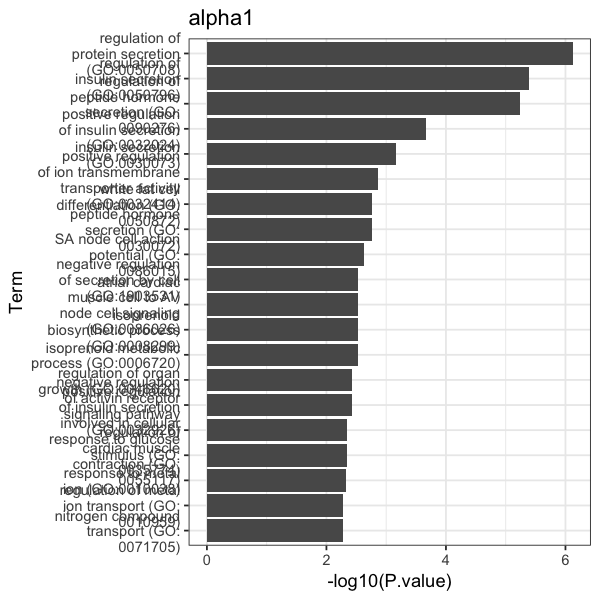

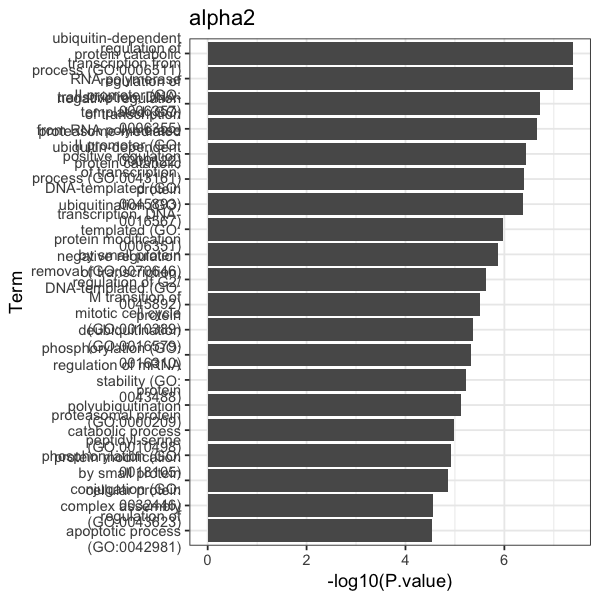

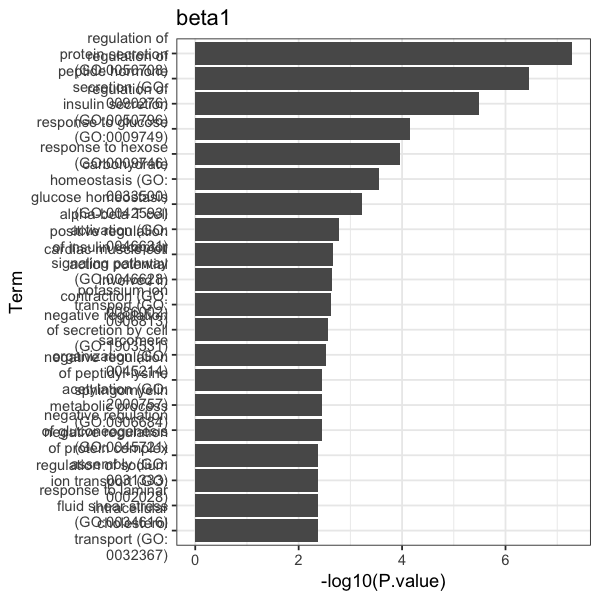

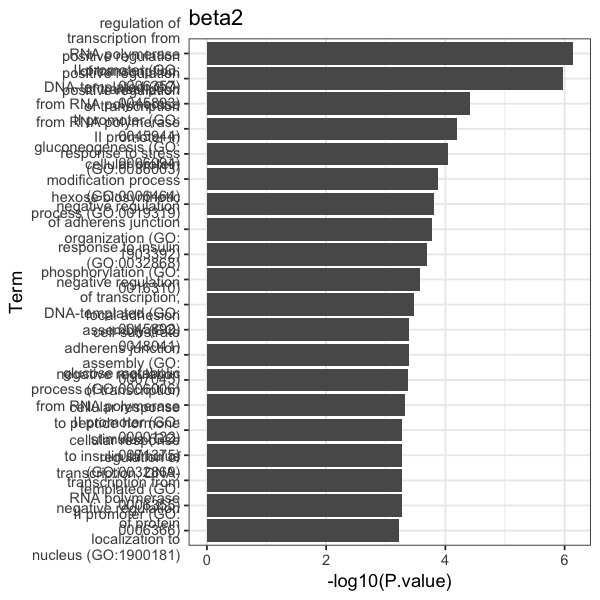

In [34]:
require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
#pdf(file='../dat/1901/binary.glist.enrichr.top5_pval.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(P.value),n=20)%>%
                 mutate(Term=factor(stringr::str_wrap(Term, 20),
                        levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
#dev.off()

In [10]:
require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
pdf(file='../dat/1901/binary.glist.enrichr.top5_padj.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(Adjusted.P.value))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Adjusted.P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
pdf(file='../dat/1901/binary.glist.enrichr.top5_pval.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(P.value))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

## combined score 
pdf(file='../dat/1901/binary.glist.enrichr.top5_combinescore.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$GO_Biological_Process_2018%>%
            arrange(desc(Combined.Score)))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,Combined.Score))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

### plot Top3 KEGG

In [11]:
require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
pdf(file='../dat/1901/binary.glist.enrichr.kegg.top5_padj.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$KEGG_2016%>%
            arrange(Adjusted.P.value))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Adjusted.P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

require(ggplot2)
options(repr.plot.width=5, repr.plot.height=5)
pdf(file='../dat/1901/binary.glist.enrichr.kegg.top5_pval.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$KEGG_2016%>%
            arrange(P.value))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(P.value)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

## combined score 
pdf(file='../dat/1901/binary.glist.enrichr.kegg.top5_combinescore.pdf')
for(i in c("alpha1","alpha2","beta1","beta2"))
    print(ggplot(head(go.res[[i]]$KEGG_2016%>%
            arrange(desc(Combined.Score)))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,Combined.Score))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## 2. David GO

In [13]:
david.go.res <- list()
all.names <- c("alpha1","alpha2","beta1","beta2","alpha1_kegg","alpha2_kegg","beta1_kegg","beta2_kegg")
for(i in all.names){
    res <- read.delim(paste0('../dat/1901/',i,'.txt'),header = T,sep = "\t")[,-1]
    names(res)<- sub("X.","percent",names(res))
    david.go.res[[i]] <- res
}
## top 5 
pdf(file='../dat/1901/binary.glist.davidgo.top5_pval.pdf')
for(i in all.names)
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(PValue))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(PValue)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()
pdf(file='../dat/1901/binary.glist.davidgo.top5_padj.Bonferroni.pdf')
for(i in all.names)
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(Bonferroni))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Bonferroni)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()
pdf(file='../dat/1901/binary.glist.davidgo.top5_padj.Benjamini.pdf')
for(i in all.names)
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(Benjamini))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(Benjamini)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()
pdf(file='../dat/1901/binary.glist.davidgo.top5_FDR.pdf')
for(i in all.names)
    print(ggplot(head(david.go.res[[i]]%>%
            arrange(FDR))%>%mutate(Term=factor(stringr::str_wrap(Term, 20),
                                                            levels = rev(stringr::str_wrap(Term, 20)))),
       aes(Term,-log10(FDR)))+ ggtitle(i)+
       geom_bar(stat = "identity")+coord_flip()+theme_bw())+theme(axis.title.x = element_text(size = 2))
dev.off()
saveRDS(david.go.res,file = '../dat/1901/david.go.res.Rds')

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

In [28]:
david.go.res <- readRDS('../dat/1901/david.go.res.Rds')

In [42]:
names(david.go.res)

[1] "alpha1"      "alpha2"      "beta1"       "beta2"       "alpha1_kegg"
[6] "alpha2_kegg" "beta1_kegg"  "beta2_kegg"

In [32]:
t(sapply(c("two.sided", "greater" ,"less"), function(x) 
    fisher.test(rbind(c(7,67),c(148-7,16792-67)),alternative = x)$p.val))

two.sided,greater,less
3.717893e-06,3.717893e-06,0.9999997


In [31]:
head(david.go.res$alpha1%>%select(-Genes)%>%arrange(PValue))

Term,Count,percent,PValue,List.Total,Pop.Hits,Pop.Total,Fold.Enrichment,Bonferroni,Benjamini,FDR
GO:0050796~regulation of insulin secretion,7,4.142012,2.612642e-05,148,67,16792,11.853973,0.02405607,0.02405607,0.04090056
GO:0007010~cytoskeleton organization,7,4.142012,2.949170e-03,148,161,16792,4.933020,0.93624373,0.74749995,4.51928892
GO:0035774~positive regulation of insulin secretion involved in cellular response to glucose stimulus,3,1.775148,2.648000e-02,148,29,16792,11.737185,1.00000000,0.99976059,34.30903074
GO:0030036~actin cytoskeleton organization,5,2.958580,2.743774e-02,148,130,16792,4.363825,1.00000000,0.99846977,35.31367701
GO:0007623~circadian rhythm,4,2.366864,2.807738e-02,148,75,16792,6.051171,1.00000000,0.99505066,35.97660966
GO:0030073~insulin secretion,3,1.775148,2.998647e-02,148,31,16792,10.979948,1.00000000,0.99116615,37.91760919


In [46]:
for (i in c("alpha1","alpha2","beta1","beta2")){
     fwrite(data.frame(rank=1:20,head(david.go.res[[i]]%>%arrange(PValue),n=20)),  
            file=paste0("../dat/1901/",i,"_David_BP.csv"))
     system(paste0("open ../dat/1901/",i,"_David_BP.csv"))
}